In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# warning 없애주기
import warnings
warnings.filterwarnings(action='ignore')

#### 1. 캐글에서 데이터 찾기

In [2]:
# 데이터프레임 불러오기
df = pd.read_csv('data/iris.data.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 컬럼명 바꾸기
df.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2. 데이터프레임에서 필요한 데이터 찾기

In [4]:
# 첫번째 원소 선택
species = df['Species']
print(species[0])

Iris-setosa


In [6]:
# 방법 1: Species열 제외하고 'Sepal length'~'Petal width'만 출력
selected_df1 = df.loc[:, 'Sepal_length':'Petal_width']
selected_df1

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# 방법 2
selected_df2 = df.drop('Species', axis=1)  # 0: index, 1: column
selected_df2

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# df에서 'Sepal length'열과 'Species'열을 선택하여 화면에 출력
selected_df3 = df.loc[:, ['Sepal_length', 'Species']]
selected_df3

,Sepal_length,Species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa
...,...,...
145,6.7,Iris-virginica
146,6.3,Iris-virginica
147,6.5,Iris-virginica
148,6.2,Iris-virginica


In [9]:
# 바로 위 df에서 10~13번째 행 인덱스에 해당하는 데이터 추출 및 화면에 출력
selected_df4 = df.loc[10:13, ['Sepal_length', 'Species']]
selected_df4

,Sepal_length,Species
10,5.4,Iris-setosa
11,4.8,Iris-setosa
12,4.8,Iris-setosa
13,4.3,Iris-setosa


#### 3. 문자열 데이터를 찾아서 바꾸기

In [12]:
# 'Species'열의 첫번째 데이터는 'Iris-setosa'라는 문자열이다. 
# -를 기준으로 문자를 'Iris'와 'Setosa'로 분할하고 2번째 원소 선택

print(df['Species'][0].split('-'))
df['Species'][0].split('-')[1]

['Iris', 'setosa']


'setosa'

In [13]:
# 방법 2
df['Species'][0].replace('Iris-', "")

'setosa'

In [14]:
# Species열의 모든 데이터를 대상으로 'Iris-'에 해당하는 문자열 제거하여 
# Species_1 열 추가하여 저장. replace 함수 사용. 

result = []

for text in df['Species']:
    cleaned_text = text.replace('Iris-','')
    result.append(cleaned_text)

df['Species_1'] = result

print('데이터 갯수: ', len(result))
print('첫 3개 데이터: ', result[:3])
df.head()

데이터 갯수:  150
첫 3개 데이터:  ['setosa', 'setosa', 'setosa']


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Species_1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [15]:
# Species 열의 모든 데이터를 대상으로 'Iris-'에 해당하는 문자열 제거
# 결과를 Species_2 열에 저장. split 함수 사용

result = []

for text in df['Species']:
    cleaned_text = text.split('-')[1]
    result.append(cleaned_text)

df['Species_2'] = result

print('데이터 갯수: ', len(result))
print('첫 3개 데이터: ', result[:3])
df.head()

데이터 갯수:  150
첫 3개 데이터:  ['setosa', 'setosa', 'setosa']


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Species_1,Species_2
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa,setosa


#### 4. 워드 클라우드 만들기

In [20]:
# 데이터프레임의 Species_2 컬럼에 들어 있는 품종 데이터의 도수 계산
# for문 사용, 딕셔너리에 결과 저장

count_df = {}

for text in df['Species_2']:
    if not text in count_df.keys(): # 처음에 1로 설정한다는 뜻 
        count_df[text] = 1
        
        # print('첫 : ',count_df.keys())
        # print('첫 숫자', count_df[text])
    else:
        count_df[text] += 1
        # print('두번째 : ',count_df.keys())
        # print('둘 숫자', count_df[text])

# count_df[text]
count_df


{'setosa': 50, 'versicolor': 50, 'virginica': 50}

In [21]:
# 파이썬 collections 모듈의 Counter 함수 사용 
# Species_2 컬럼에 들어 있는 품종 데이터 도수 계산

from collections import Counter
Counter(df['Species_2'])

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

In [22]:
# pandas series 객체의 value_counts 함수 적용
# Species_2 컬럼에 들어 있는 품종 데이터 도수 계산

df['Species_2'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species_2, dtype: int64

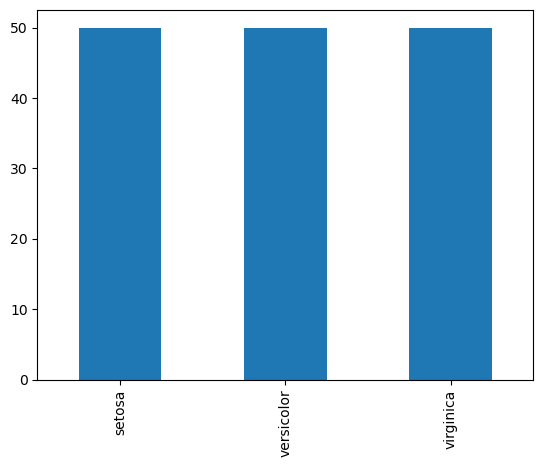

In [25]:
# 위에서 계산한 도수를 막대그래프로 표현 -> pandas series의 plot 메소드 함수 적용
df['Species_2'].value_counts().plot(kind='bar')
plt.show()

In [26]:
# Wordcloud 라이브러리 설치
# conda install -c conda-forge wordcloud 

결합된 문자열:  setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa setosa versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor versicolor virginica virginica virginica virginica virginica virginica virginica virginica virginica 

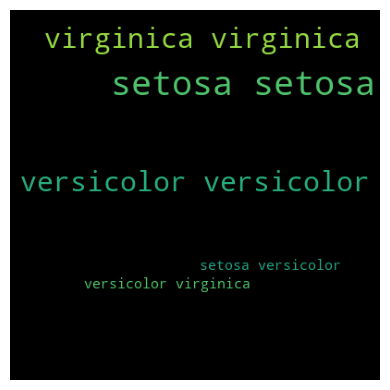

In [27]:
# 아래 코드 이용하여 워드클라우드 화면에 출력 
# string_data 변수에는 문자열 하나로 결합

# 문자열 결합
string_data = ' '.join(df['Species_2'].values)
print("결합된 문자열: ", string_data)

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                     ).generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

{'setosa': 50, 'versicolor': 50, 'virginica': 50}


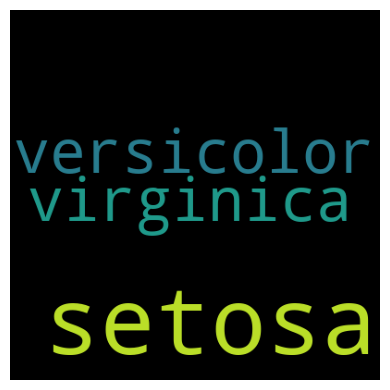

In [28]:
# dict_data 변수에는 위에서 정리한 dictionary 입력
# 단어 갯수가 정리되어 있는 딕셔너리를 선택
dict_data = count_df
print(dict_data)

# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_words=3,
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()